In [1]:
import os
import sys
import random

import matplotlib.pyplot as plt
import numpy as np

from prl_task import create_blocks, create_schedule
from dn_utils.style import BLUE_TASK, YELLOW_TASK, MPL_STYLES

%matplotlib inline

In [2]:
path_root = os.environ.get('DECIDENET_PATH')
path_code = os.path.join(path_root, 'code')
path_figures = os.path.join(
    path_root, 
    'data/main_fmri_study/derivatives/figures/fig1')

In [3]:
plt.rcParams.update(MPL_STYLES)
plt.rcParams.update({'legend.framealpha': 1})
random.seed(3)

n_trials = 110
n_reversals = 4
n_min_stable = 15
probability = 0.8

trial_block = create_blocks(n_trials, n_reversals, n_min_stable)
trial_schedule = create_schedule(n_trials, trial_block, probability)

wcor_true = [probability if block == 1 else (1-probability) 
             for block in trial_block]
wcor = [0.5]
alpha = 0.25
for t, side in enumerate(trial_schedule[:-1]):
    pe = 1 - wcor[t] if side == 1 else 0 - wcor[t]
    wcor.append(wcor[t] + pe * alpha)

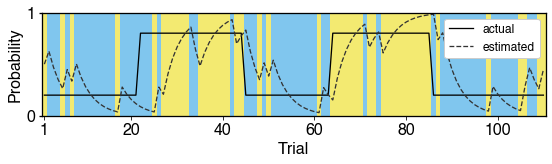

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9.025, 1.9))

ax.plot(
    np.arange(1, n_trials+1), 
    wcor_true, 
    color='k', 
    label='actual'
)

ax.plot(
    np.arange(1, n_trials+1), 
    wcor, 
    color='#333', 
    lineStyle='--', 
    label='estimated'
)

for t, side in enumerate(trial_schedule):
    ax.fill_between(
        x=(t+0.5, t+1.5), 
        y1=0, 
        y2=1, 
        color=BLUE_TASK if side == -1 else YELLOW_TASK, 
        alpha=.75, 
        edgeColor=None
    )
    
ax.set_xlim(0.5, n_trials+0.5)    
ax.set_ylim((0, 1))
ax.set_xticks([1, 20, 40, 60, 80, 100])
ax.set_yticks([0, 1])
ax.set_xlabel('Trial')
ax.set_ylabel('Probability')

plt.legend(prop={'size': 12})

fig.savefig(os.path.join(path_figures, 'fig1c.pdf'), bbox_inches='tight')
fig.savefig(os.path.join(path_figures, 'fig1c.svg'), bbox_inches='tight')
fig.savefig(os.path.join(path_figures, 'fig1c.png'), bbox_inches='tight')